In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import numpy as np
from datetime import datetime, date

In [56]:
load_dotenv()
SERVER = os.getenv("SERVER")
DATABASE = os.getenv("DATABASE")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
DRIVER = os.getenv("DRIVER")
connection_string = f"mssql+pyodbc://{USER}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}"
engine = create_engine(connection_string)


In [58]:
player = pd.read_sql("SELECT * FROM Player", engine)
team = pd.read_sql("SELECT * FROM Team", engine)
game = pd.read_sql("SELECT * FROM Game", engine)
common_player_info = pd.read_sql("SELECT * FROM Common_player_info", engine)
draft_combine_stats = pd.read_sql("SELECT * FROM Draft_combine_stats", engine)
draft_history = pd.read_sql("SELECT * FROM Draft_history", engine)
team_details = pd.read_sql("SELECT * FROM Team_details", engine)
team_history = pd.read_sql("SELECT * FROM Team_history", engine)
game_info = pd.read_sql("SELECT * FROM Game_info", engine)
game_summary = pd.read_sql("SELECT * FROM Game_summary", engine)
other_stats = pd.read_sql("SELECT * FROM Other_stats", engine)
officials = pd.read_sql("SELECT * FROM Officials", engine)
inactive_players = pd.read_sql("SELECT * FROM Inactive_players", engine)
play_by_play = pd.read_sql("SELECT * FROM Play_by_play", engine)
line_score = pd.read_sql("SELECT * FROM Line_score", engine)

KeyboardInterrupt: 

In [17]:
columnas = [(player, 'Player'), (team, 'Team'), (game, 'Game'), (common_player_info, 'Common_player_info'), (draft_combine_stats, 'Draft_combine_stats'), (draft_history, 'Draft_history'), (team_details, 'Team_details'), (team_history, 'Team_history'), (game_info, 'Game_info'), (game_summary, 'Game_summary'), (other_stats, 'Other_stats'), (officials, 'Officials'), (inactive_players, 'Inactive_players'), (play_by_play, 'Play_by_play'), (line_score, 'Line_score')]

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


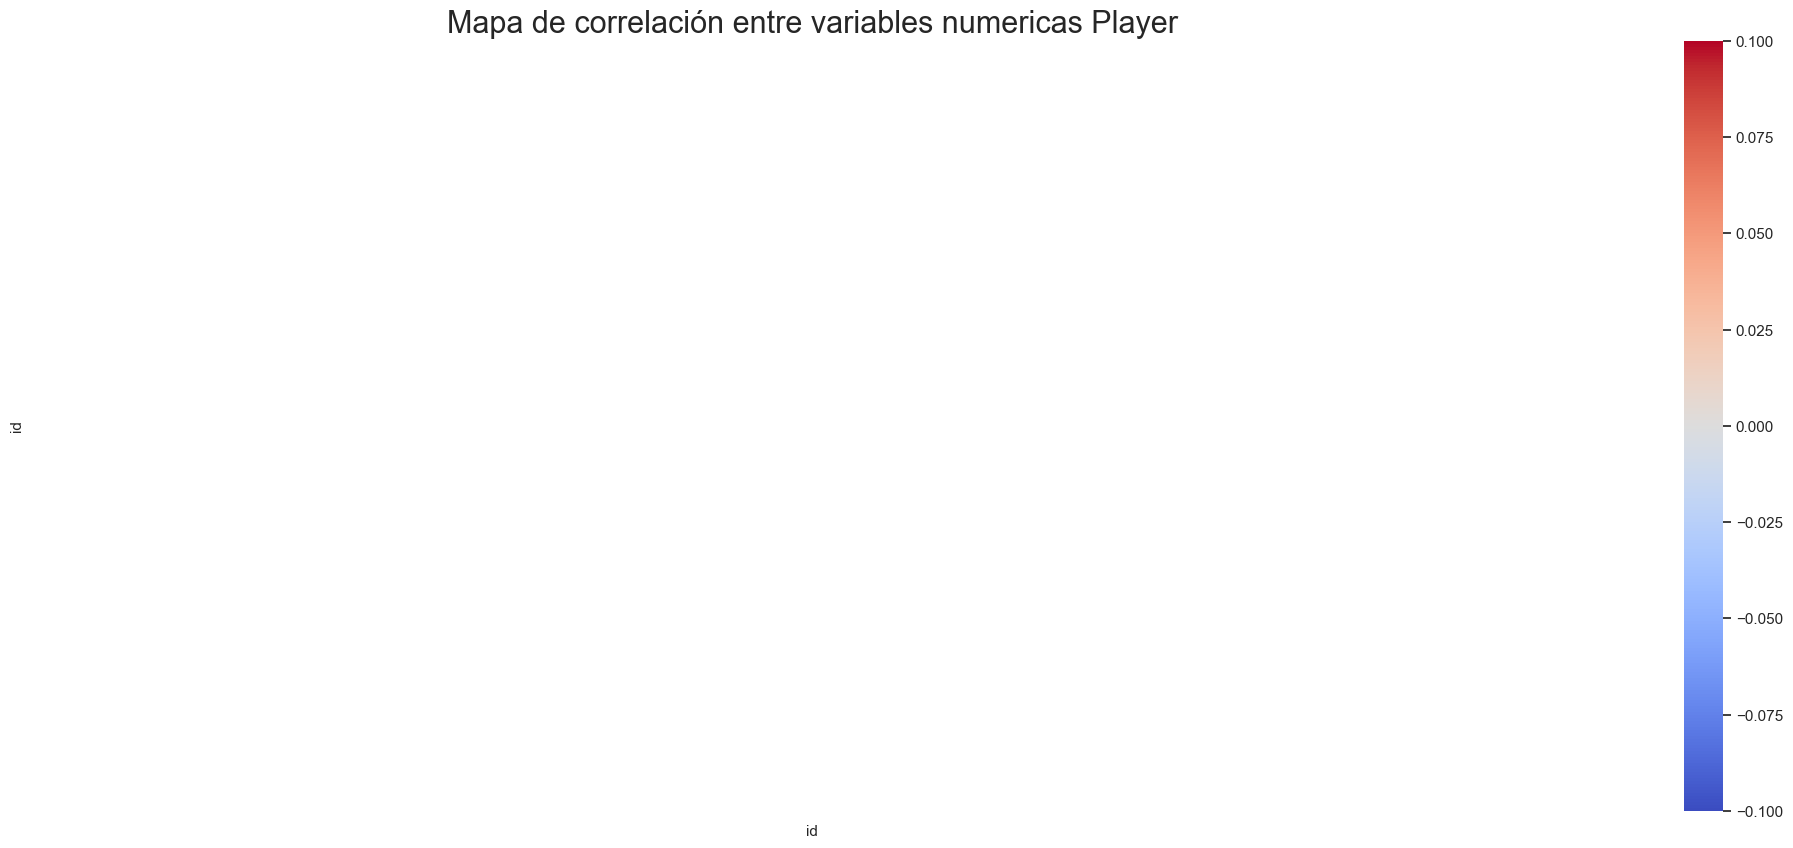

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


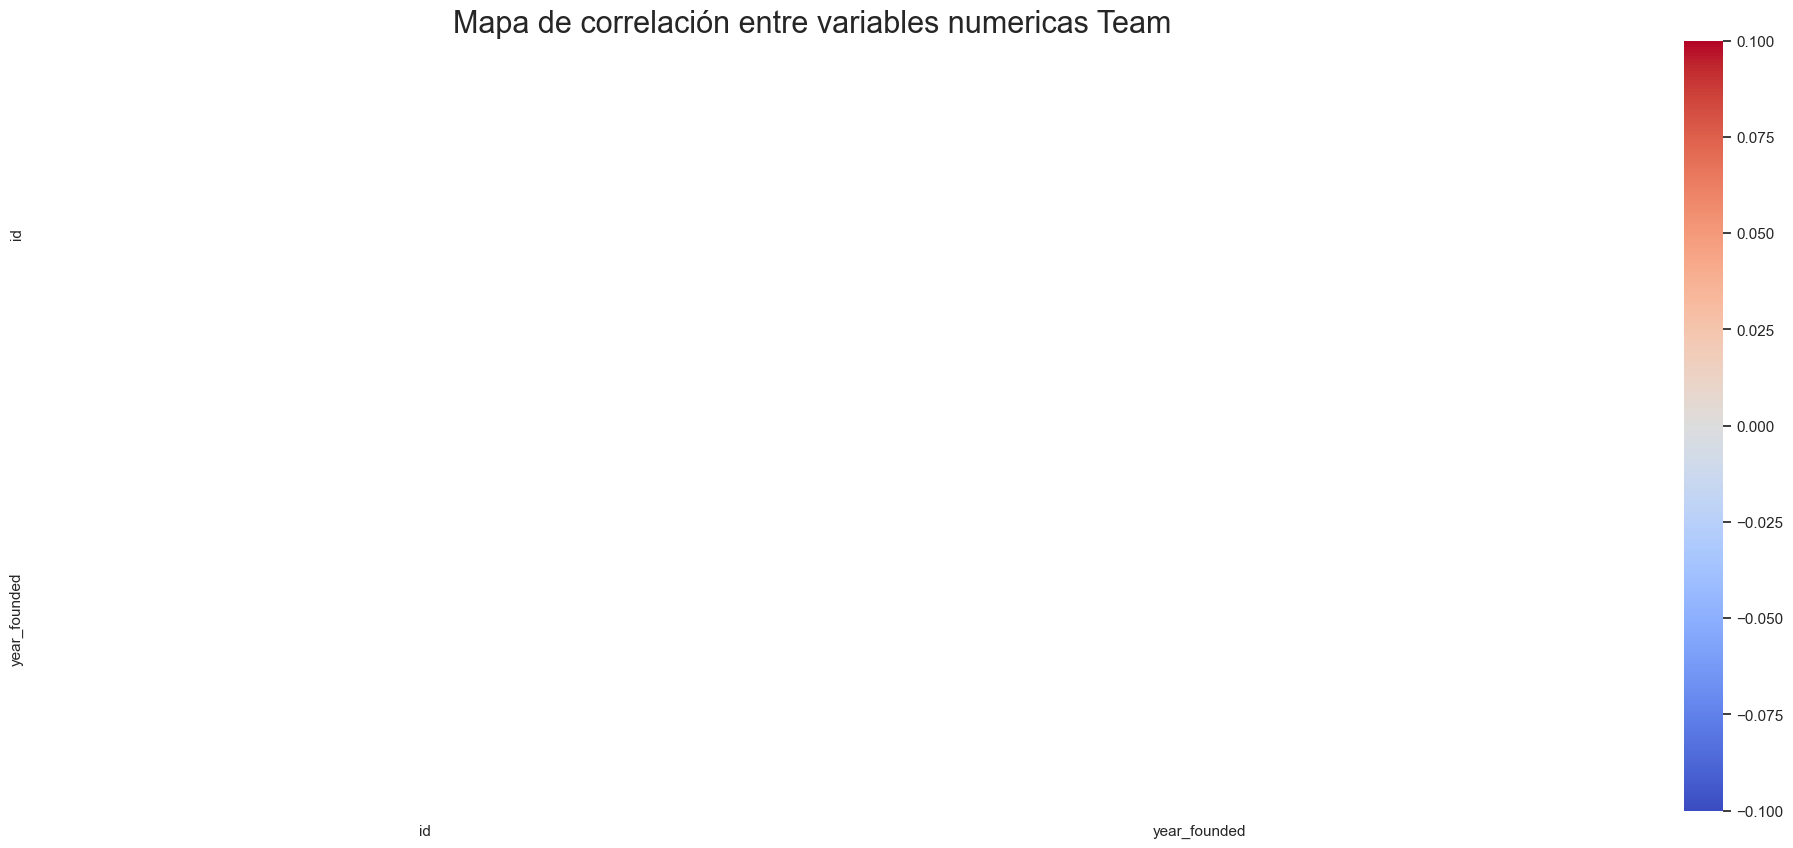

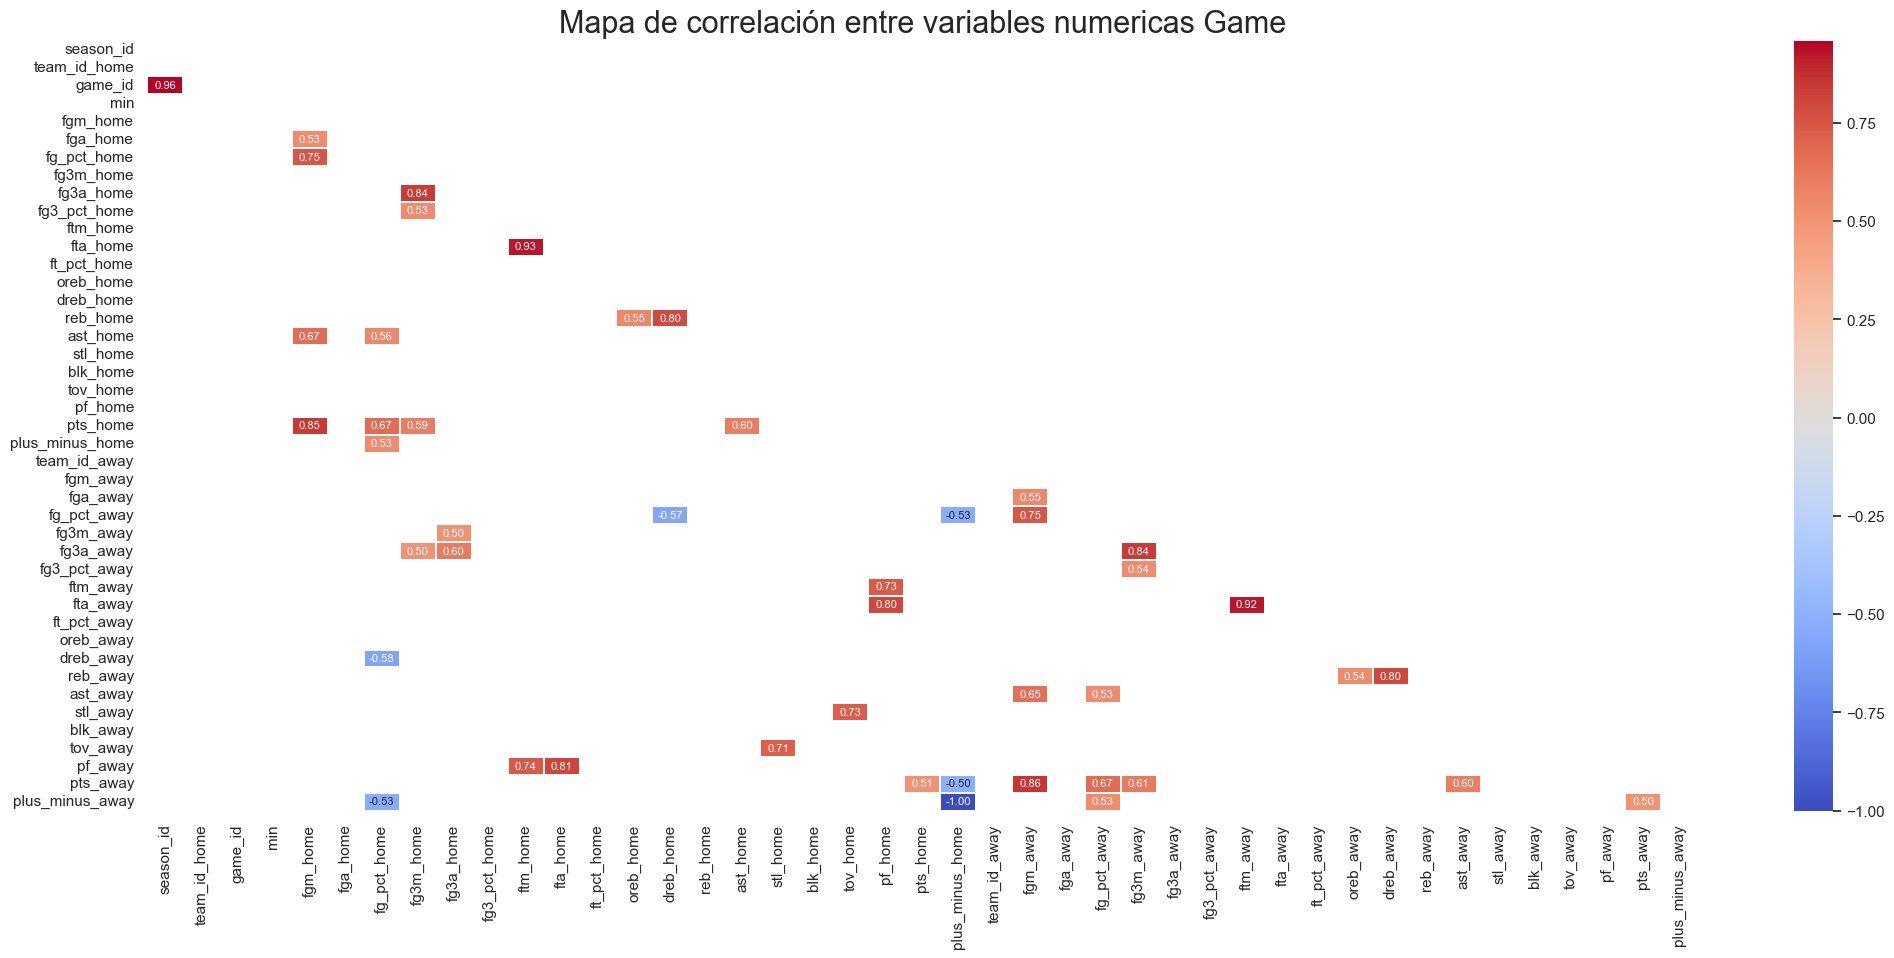

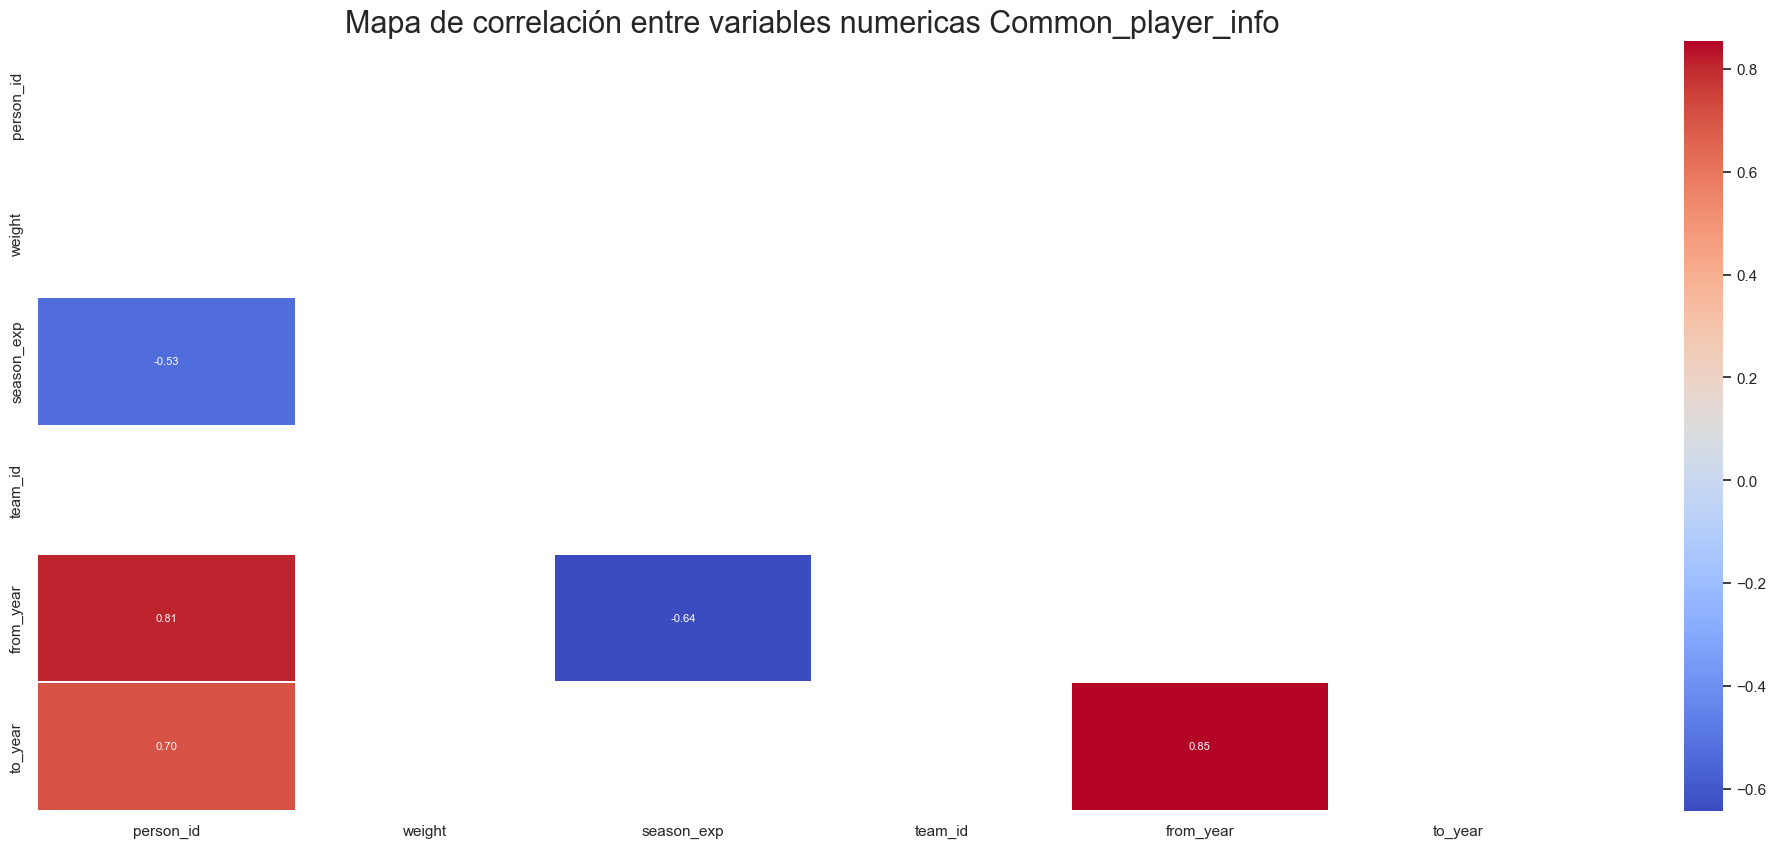

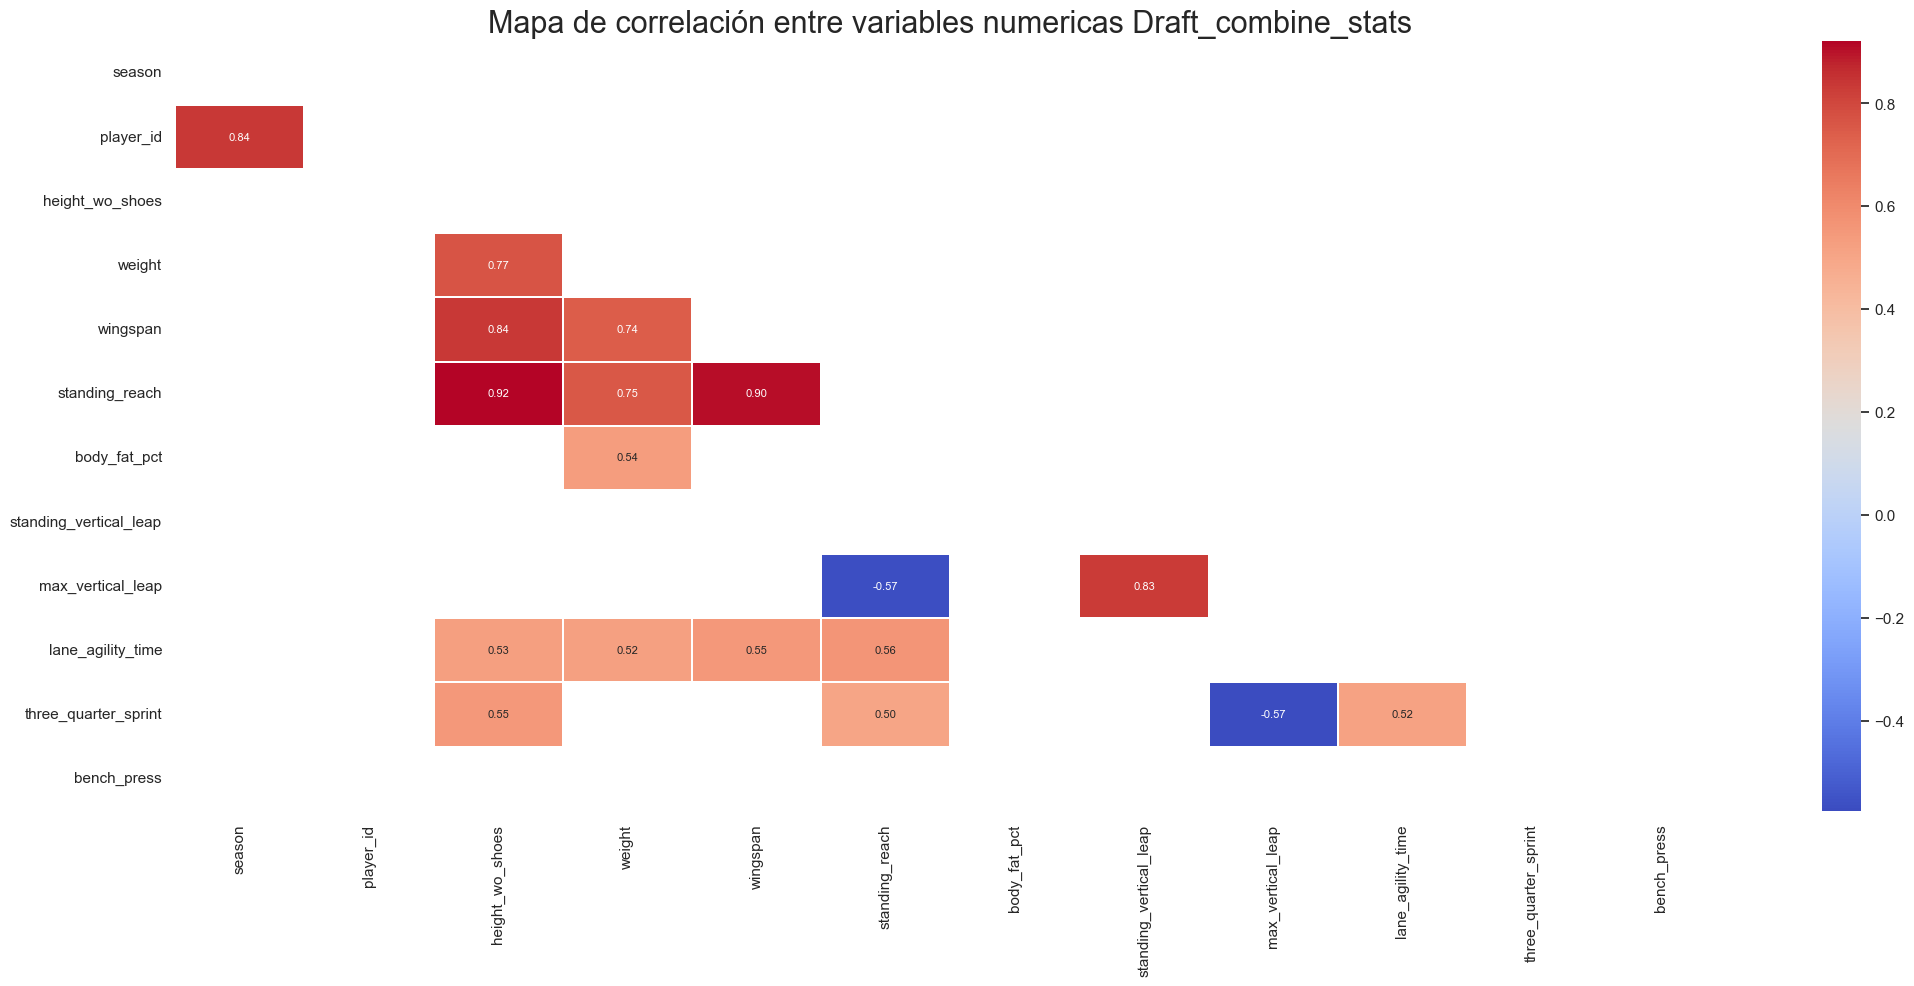

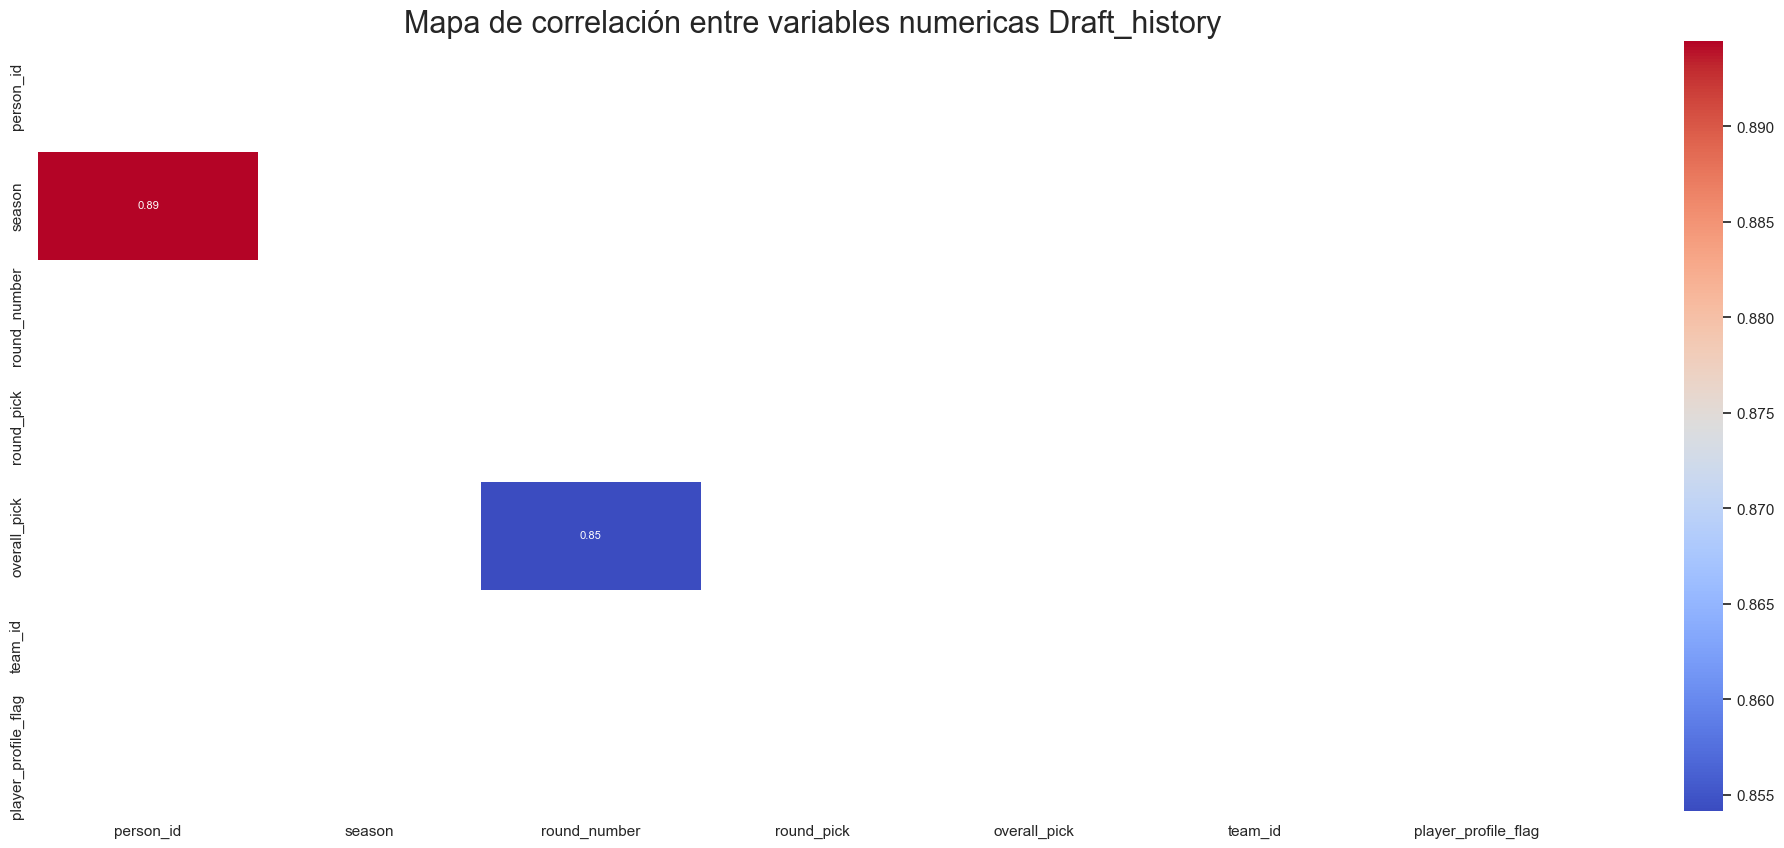

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


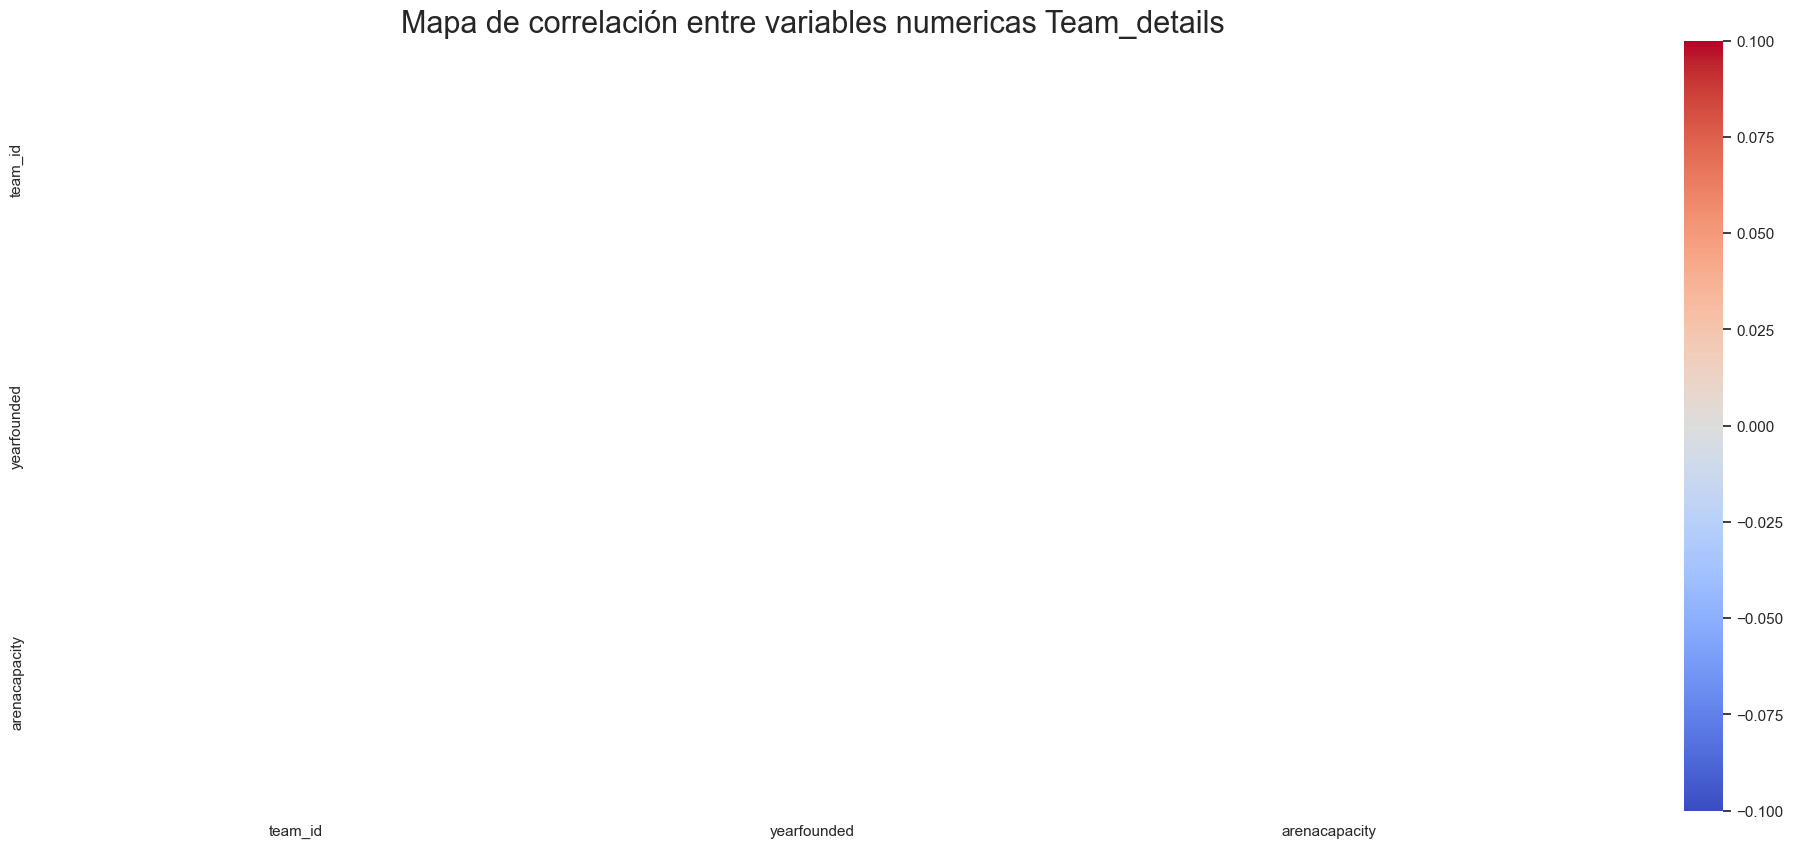

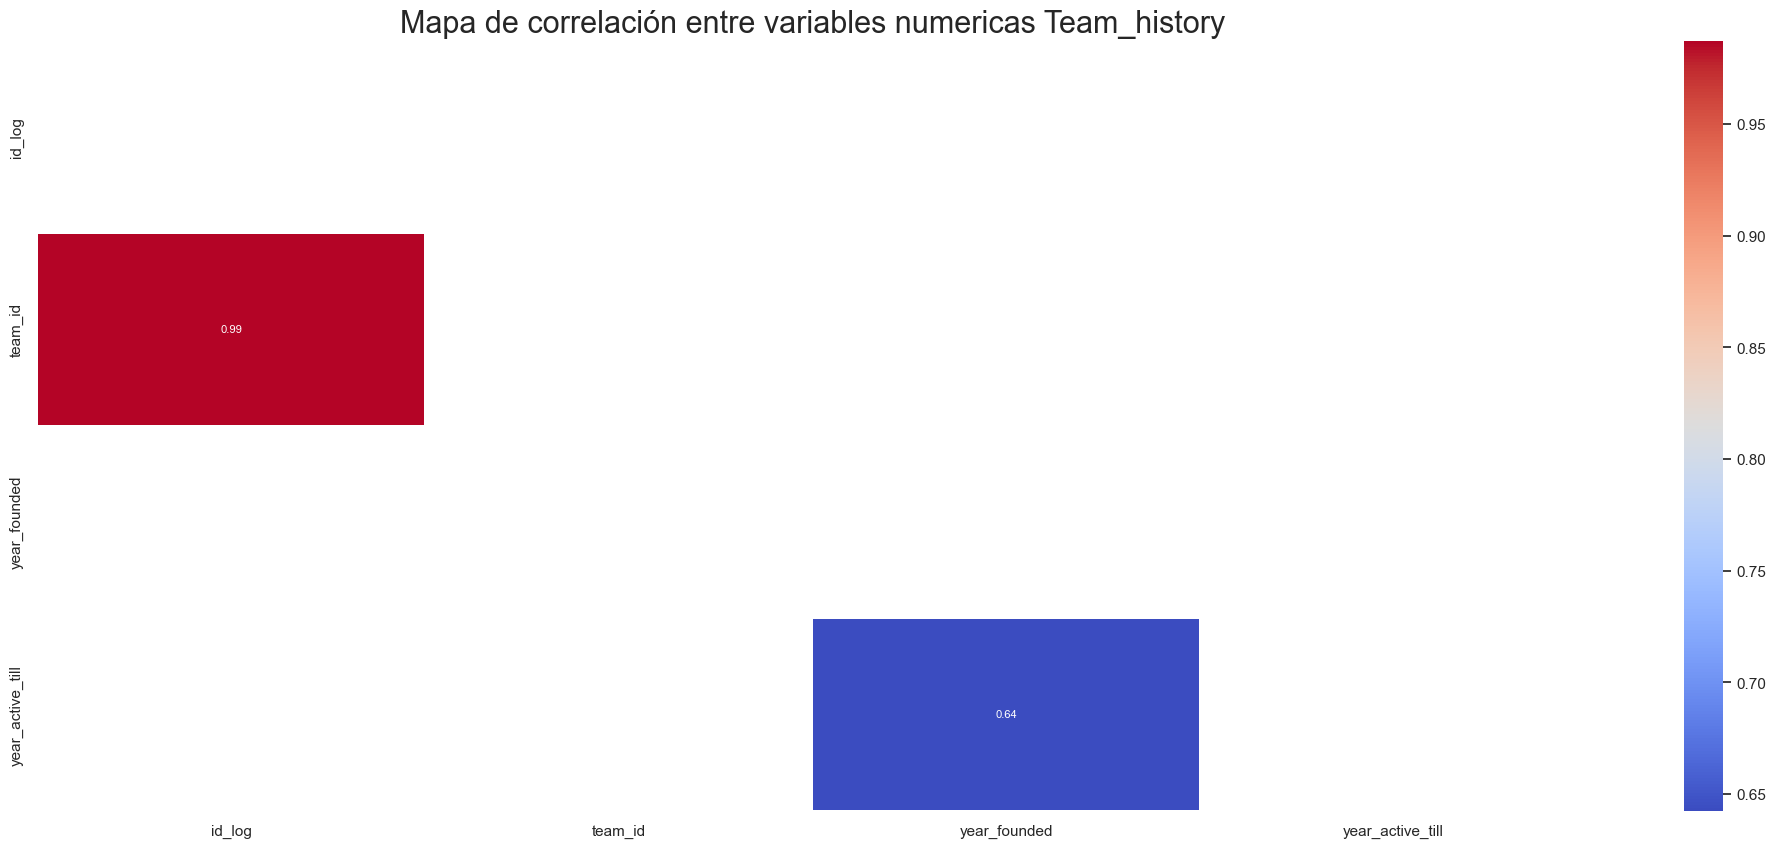

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


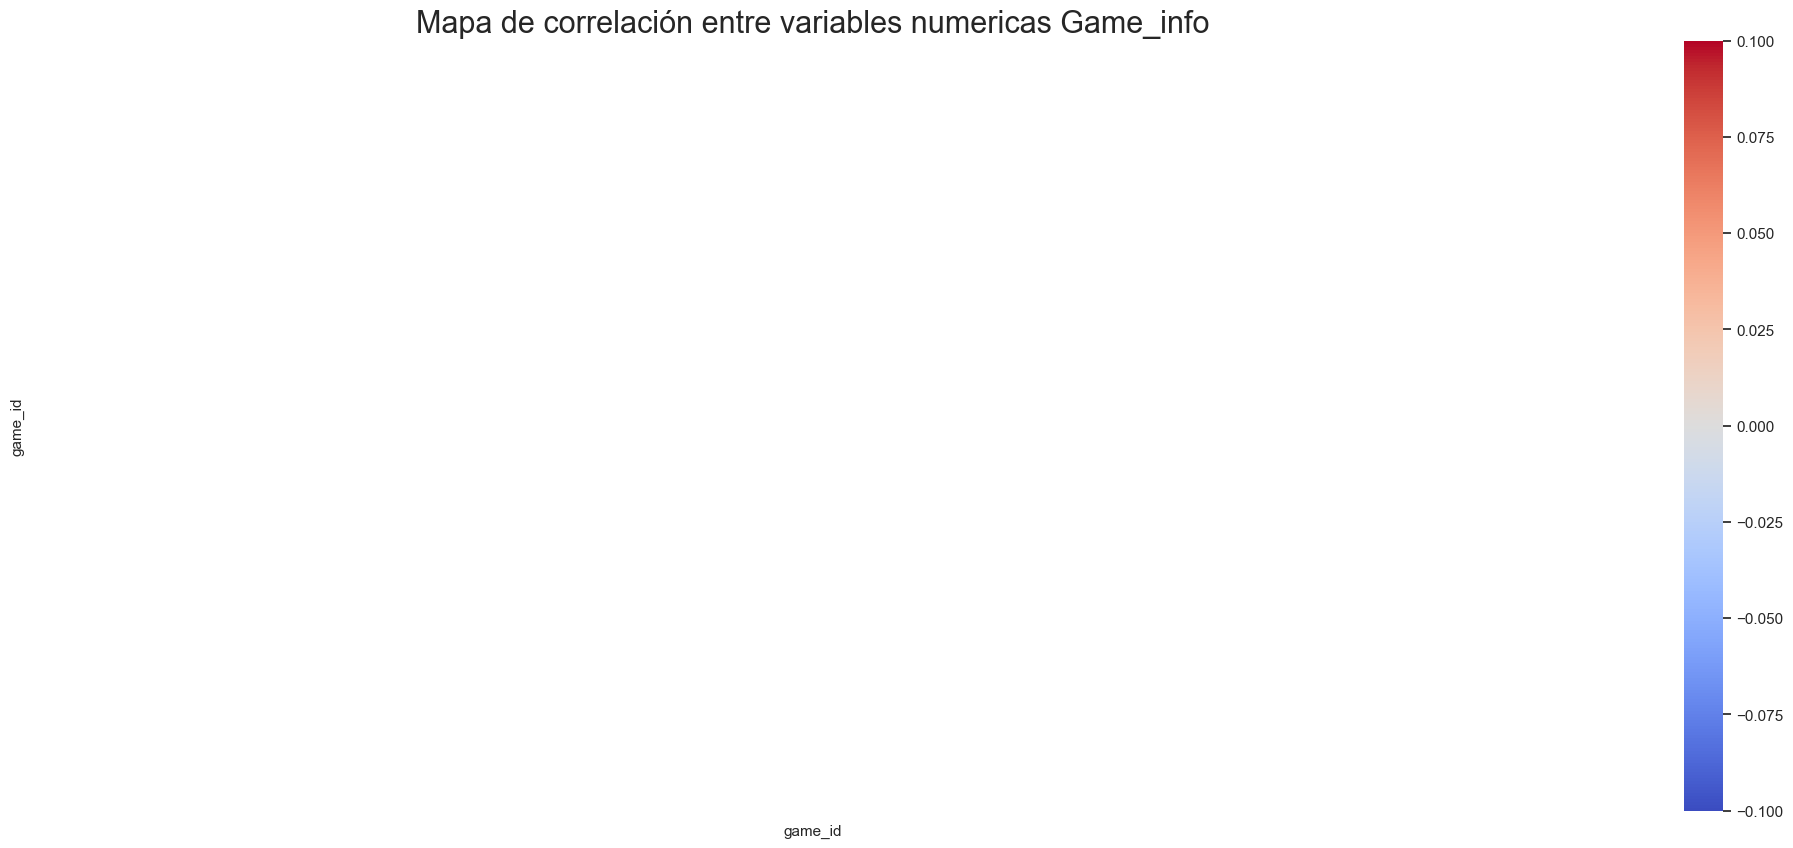

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


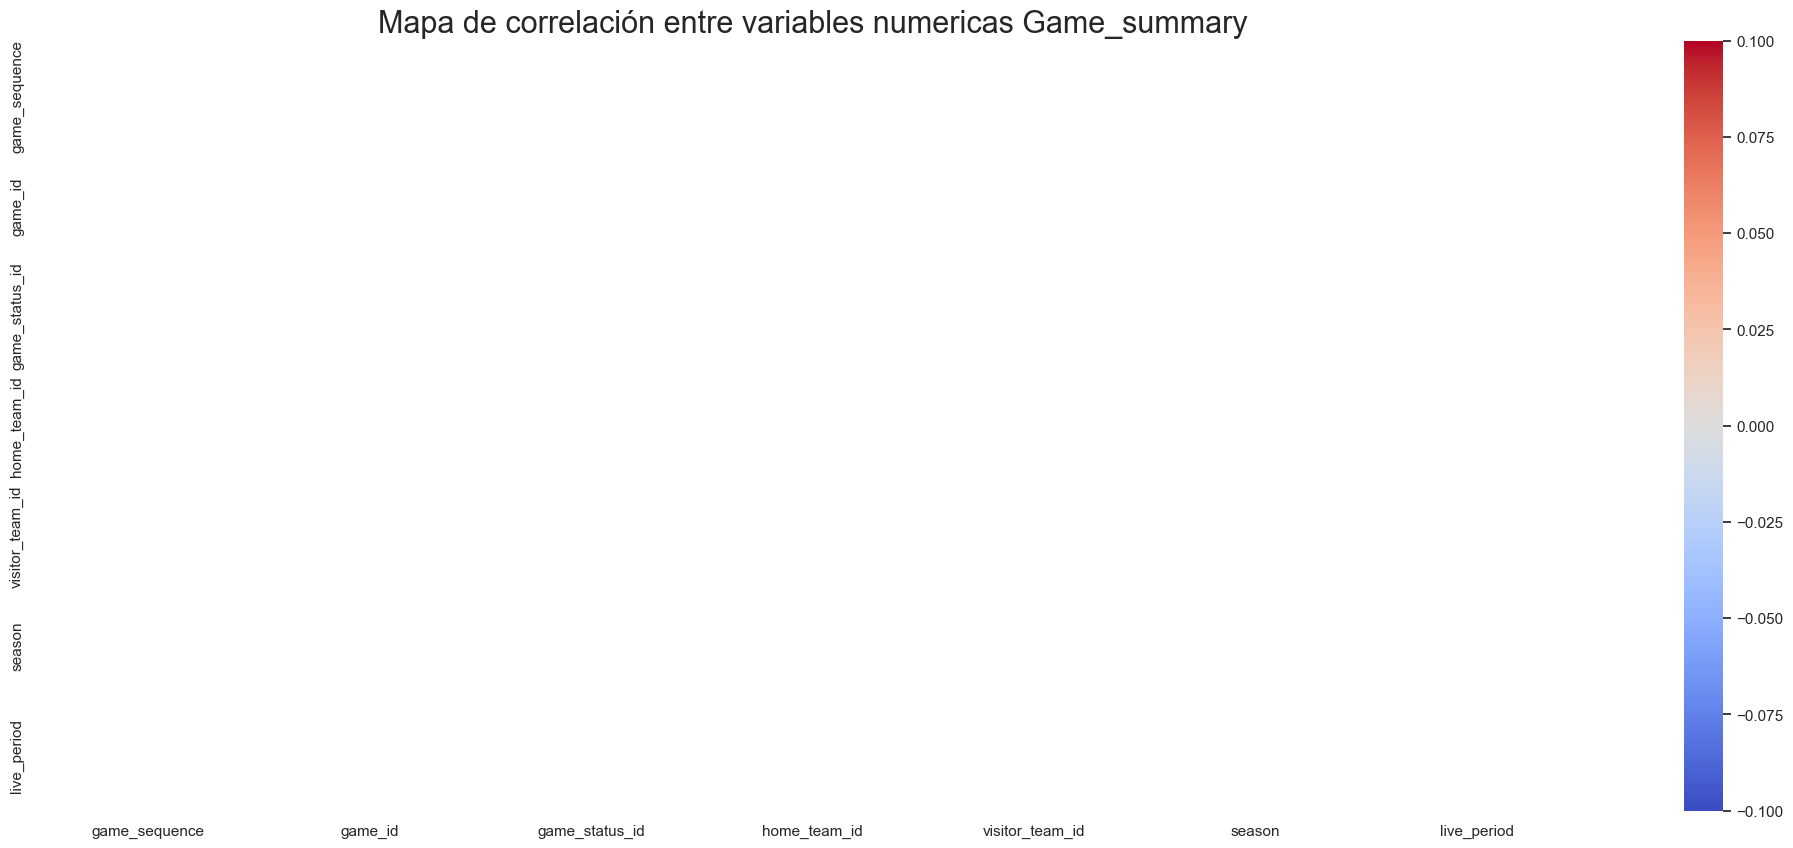

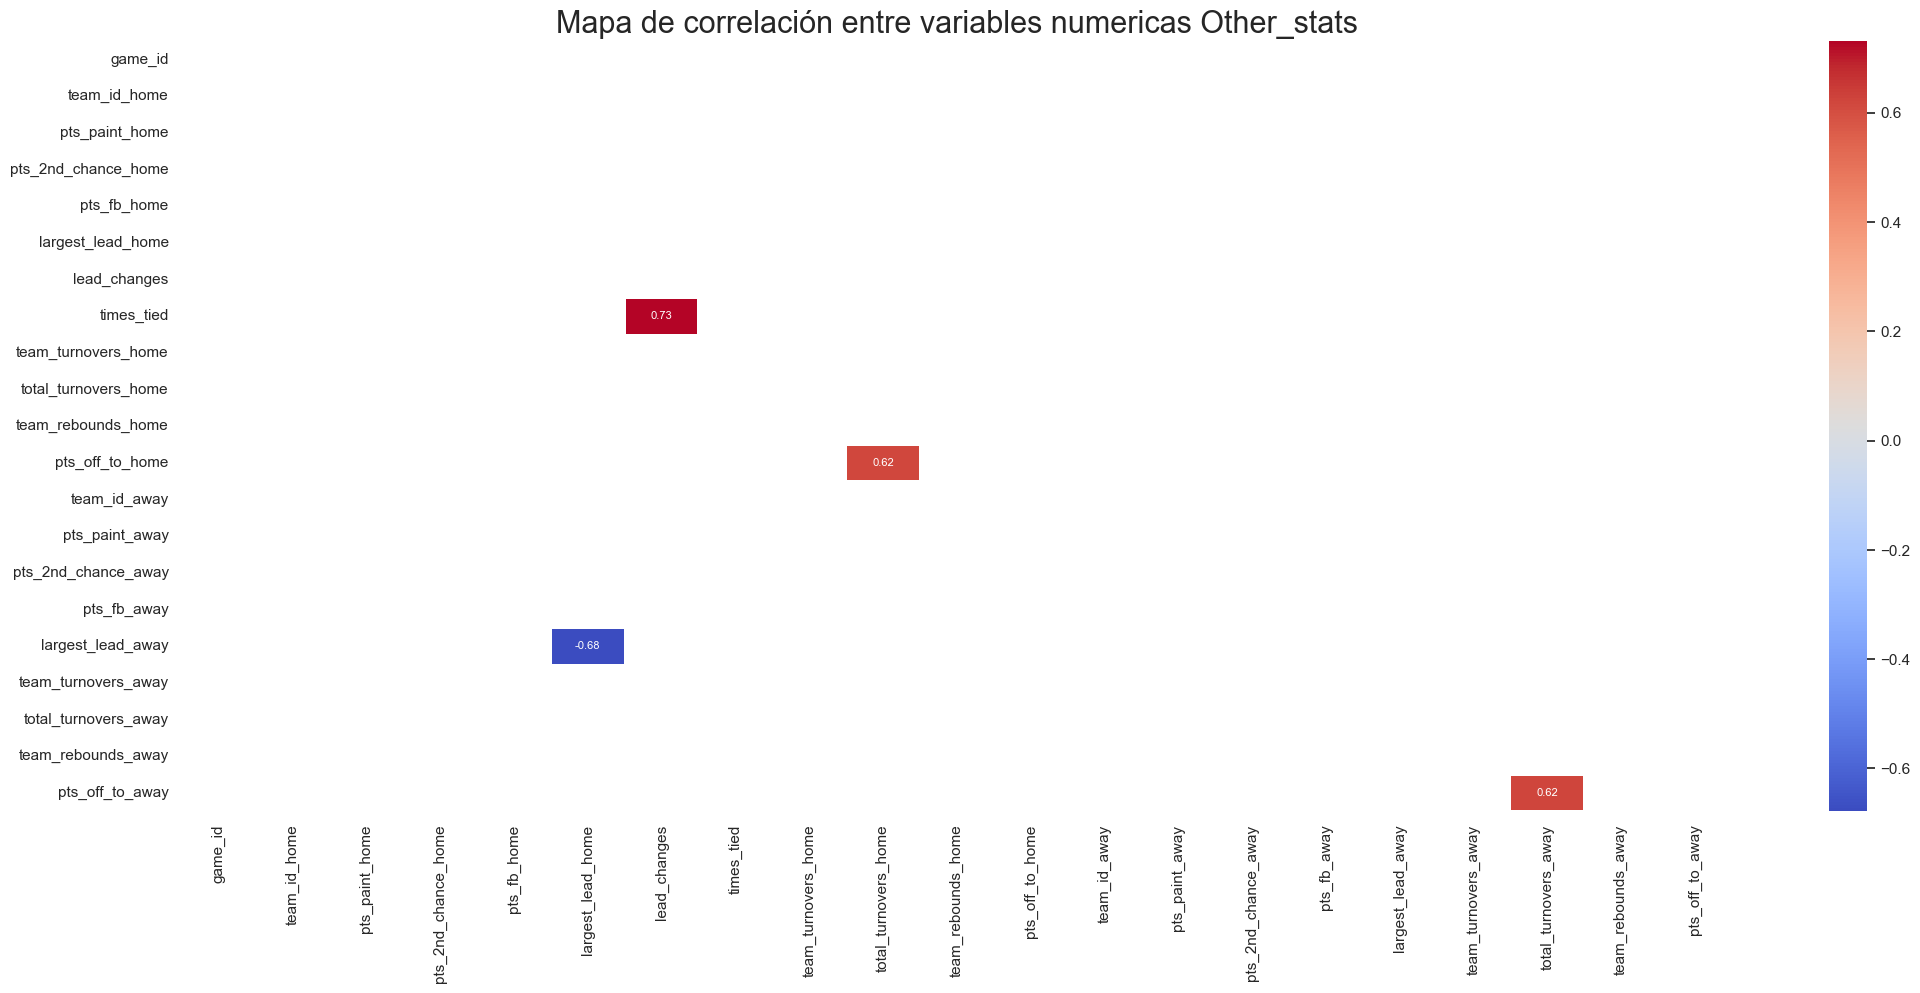

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


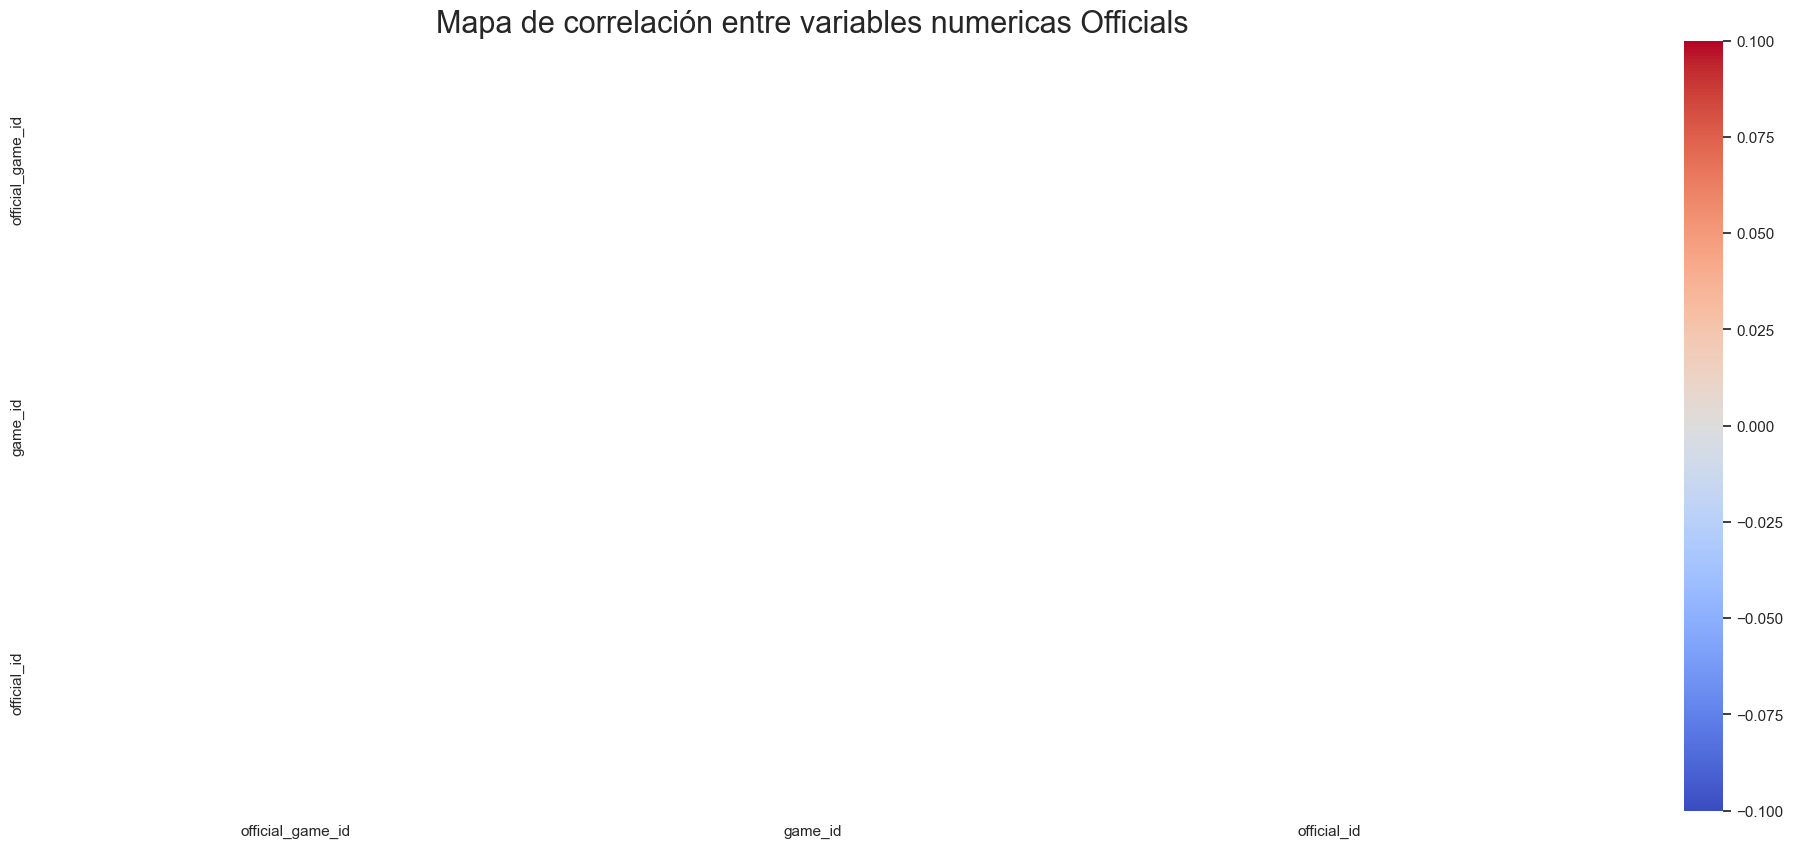

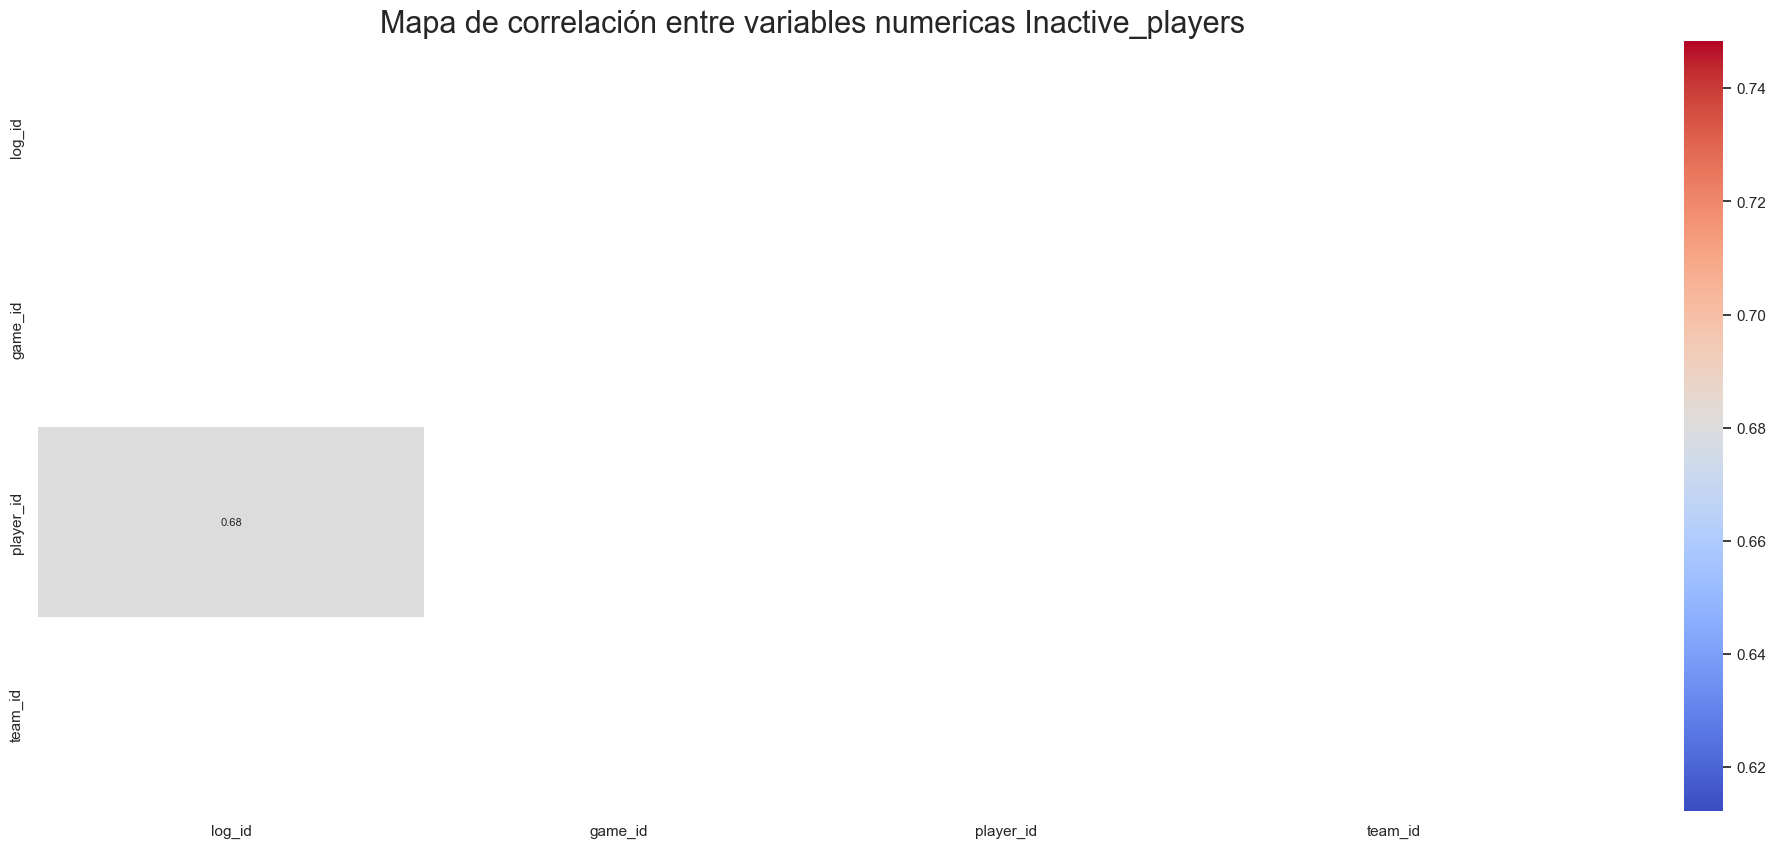

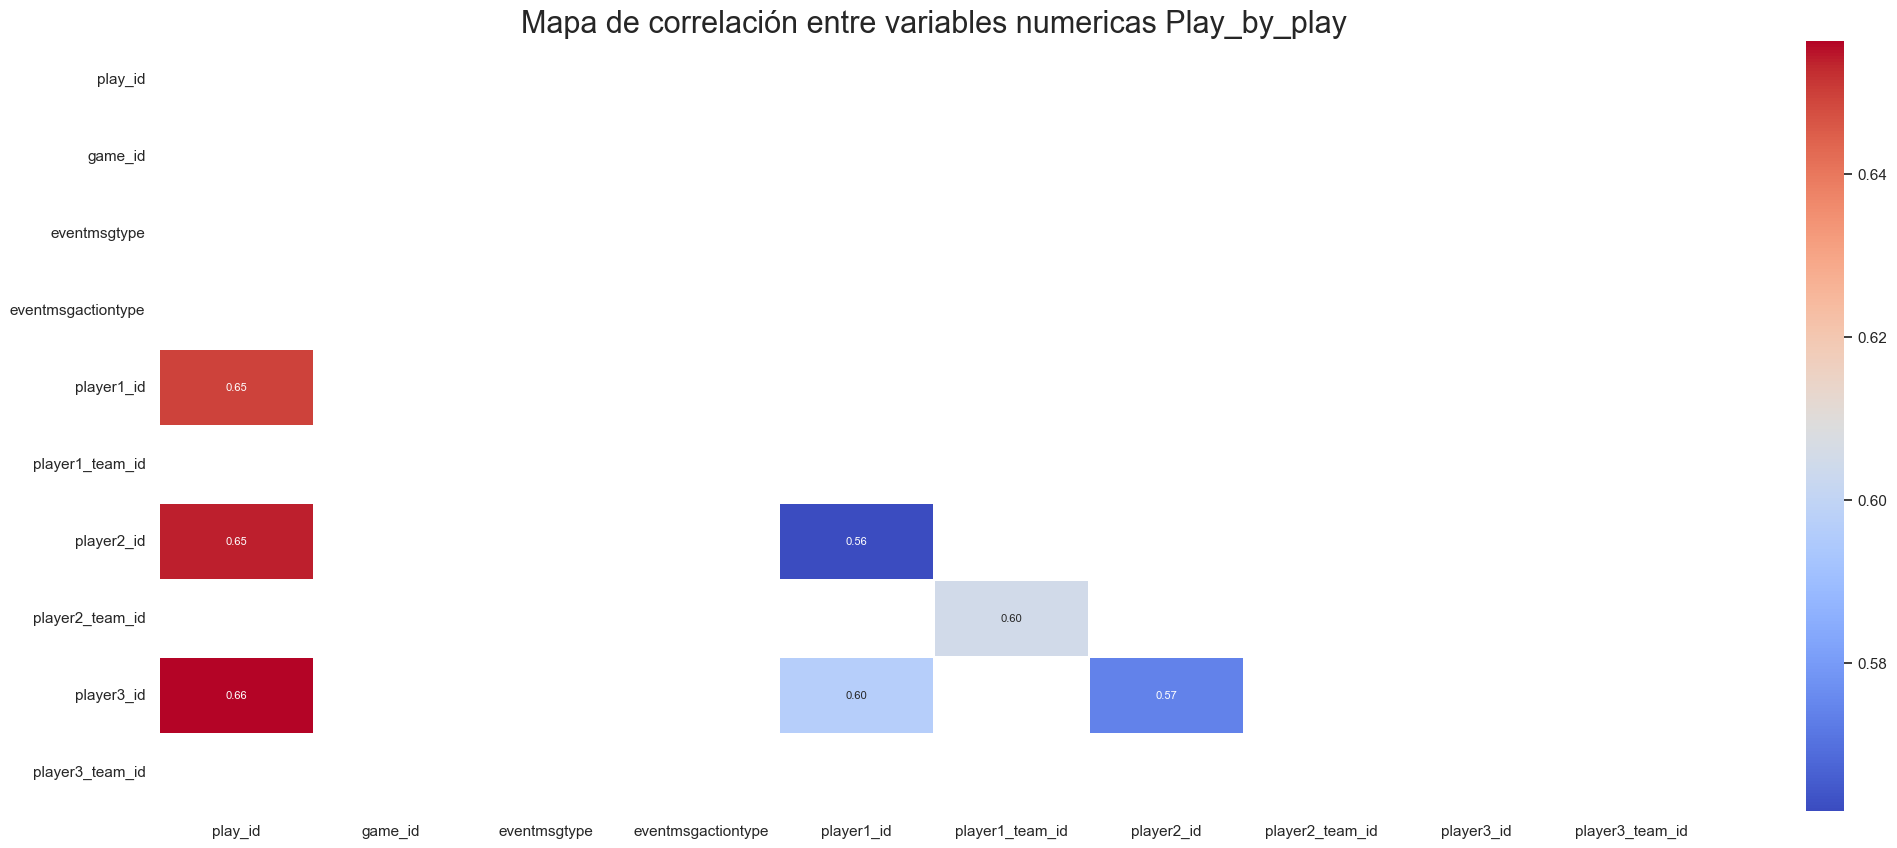

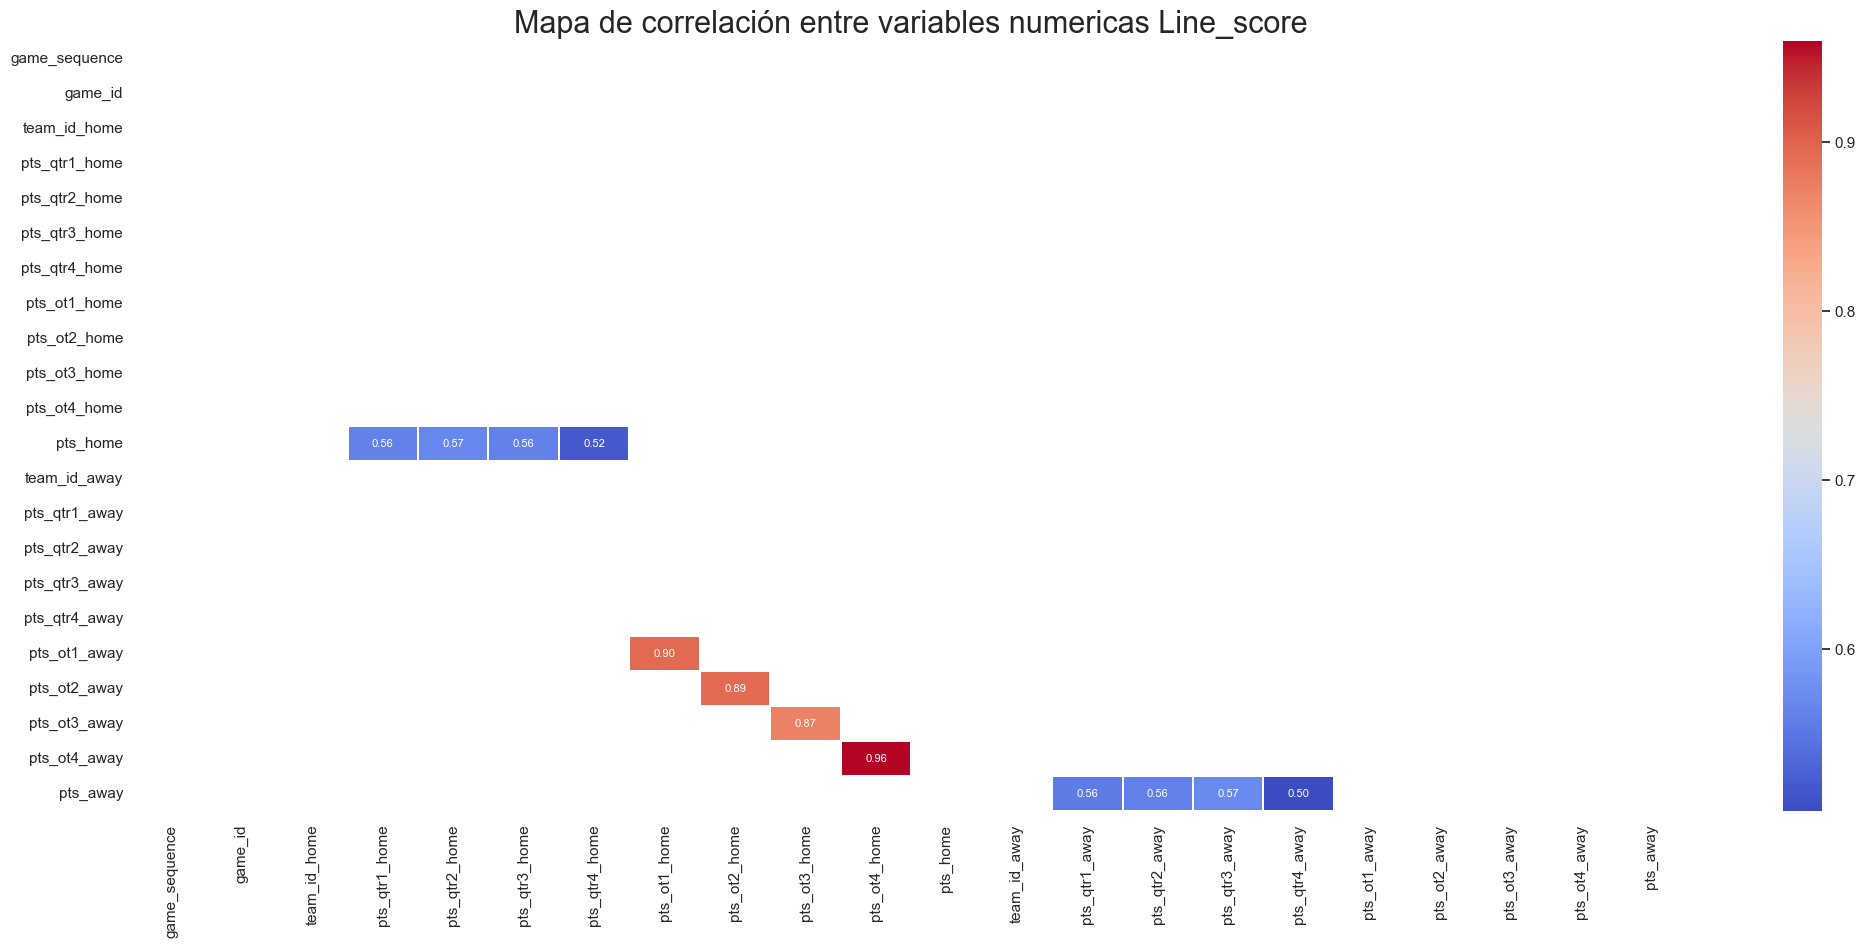

In [18]:
for columna in columnas:
    
    corr = columna[0][columna[0].select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns].corr()

    sns.set_theme(style="white")

    #Generando mascara para el triangulo
    mask = np.triu(np.ones_like(corr, dtype=bool))

    corr = corr[abs(corr) >  abs(0.5)]

    #Generando la figura
    fig, ax = plt.subplots(figsize=(25,10))

    # Dibujando el mapa de calor
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize":8}, linewidths=0.08)

    plt.title(f'Mapa de correlación entre variables numericas {columna[1]}', fontsize=22)

    plt.show()


In [19]:
tablas_comparativas = [common_player_info, draft_combine_stats, draft_history, player, game_summary]

In [62]:
hoy = date.today()
common_player_info['birthdate'] = pd.to_datetime(common_player_info['birthdate'])
common_player_info['age'] = hoy.year - common_player_info['birthdate'].dt.year 

In [53]:
common_player_info

,person_id,display_fi_last,birthdate,school,country,last_affiliation,height,weight,season_exp,position,...,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag,age
0,15,E. Piatkowski,1970-09-30,Nebraska,USA,Nebraska/USA,6-7,215,15,Guard-Forward,...,1994,2007,N,Y,Y,1994,1,15,N,55
1,21,G. Anthony,1967-11-15,UNLV,USA,UNLV/USA,6-1,180,11,Guard,...,1991,2001,N,Y,Y,1991,1,12,N,58
2,41,A. Bonner,1968-06-08,St. Louis,USA,St. Louis/USA,6-8,230,7,Forward,...,1990,2002,N,Y,Y,1990,1,23,N,57
3,42,M. Williams,1971-10-08,Notre Dame,USA,Notre Dame/USA,6-8,225,10,Forward,...,1994,2002,N,Y,Y,1994,1,24,N,54
4,43,C. Whitney,1971-10-05,Clemson,USA,Clemson/USA,6-0,175,12,Guard,...,1993,2003,N,Y,Y,1993,2,47,N,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,1631288,J. Cain,1999-03-20,Oakland,USA,Oakland/USA,6-6,191,1,Forward,...,2022,2023,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,26
1399,1631298,J. White,1997-08-05,Duke,Australia,Duke/Australia,6-7,225,1,Forward,...,2022,2023,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,28
1400,1631306,C. Swider,1999-05-08,Syracuse,USA,Syracuse/USA,6-9,220,1,Forward,...,2022,2023,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,26
1401,1631311,L. Quinones,2000-11-16,Memphis,USA,Memphis/USA,6-4,208,1,Guard,...,2022,2023,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,25


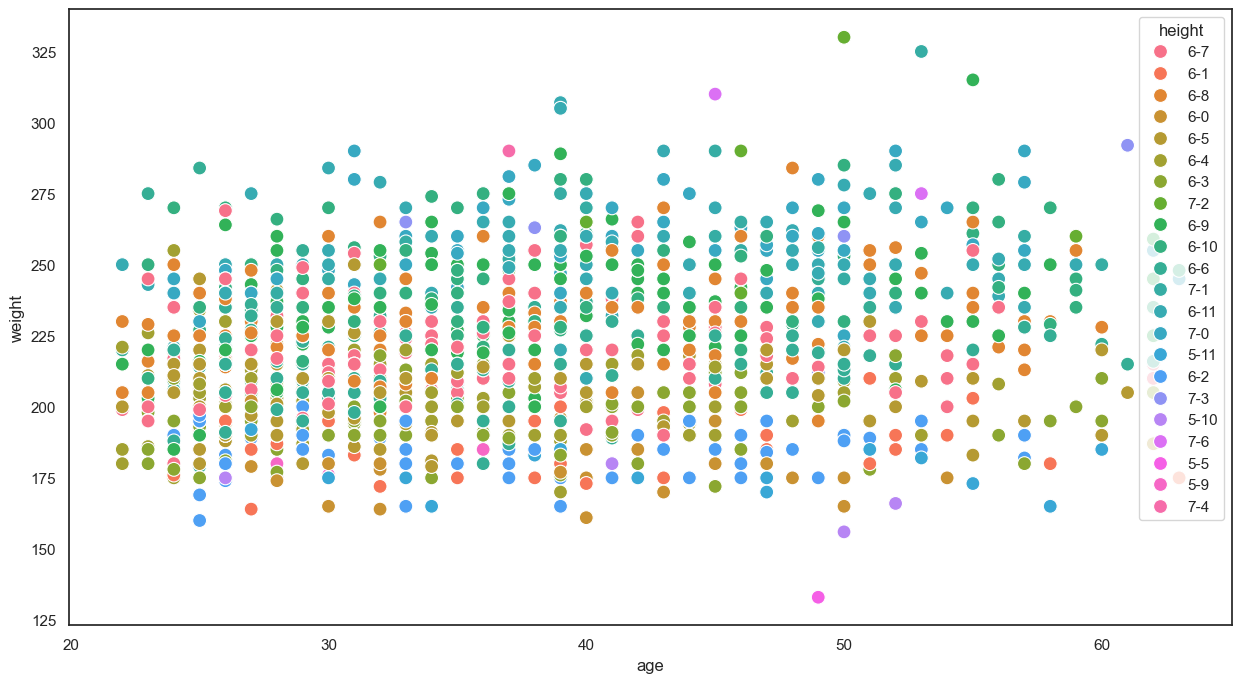

In [63]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=common_player_info, x="age", y="weight", hue="height", s=100,)
plt.show()

In [68]:
draft_combine_stats

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,weight,wingspan,standing_reach,body_fat_pct,standing_vertical_leap,max_vertical_leap,lane_agility_time,three_quarter_sprint,bench_press
0,2008,199,Reggie,Williams,Reggie Williams,SG,75.25,199.0,81.25,103.0,5.3,31.5,36.5,11.32,3.07,15
1,2001,2198,Kwame,Brown,Kwame Brown,PF-C,82.00,243.0,85.00,108.0,8.9,30.0,33.0,11.59,3.45,17
2,2001,2199,Tyson,Chandler,Tyson Chandler,SF-PF,83.50,224.0,87.00,110.0,6.7,31.0,33.5,12.13,3.36,2
3,2001,2201,Eddy,Curry,Eddy Curry,C,82.50,301.0,90.50,111.0,16.5,28.0,31.0,12.25,3.53,16
4,2001,2202,Jason,Richardson,Jason Richardson,SF-SG,76.75,213.0,83.50,102.5,5.3,32.5,39.5,11.75,3.12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2019,1629677,Luka,Samanic,Luka Samanic,PF,81.50,227.2,82.50,107.0,5.6,27.0,38.0,11.01,3.27,7
484,2019,1629678,Admiral,Schofield,Admiral Schofield,SF,76.00,240.6,81.75,102.5,6.8,30.0,34.0,10.77,3.37,15
485,2019,1629682,Tremont,Waters,Tremont Waters,PG,69.50,172.4,74.25,93.5,6.6,30.5,40.5,10.76,3.07,5
486,2019,1629684,Grant,Williams,Grant Williams,PF,77.75,240.2,81.75,104.5,5.4,26.0,31.5,10.83,3.33,20


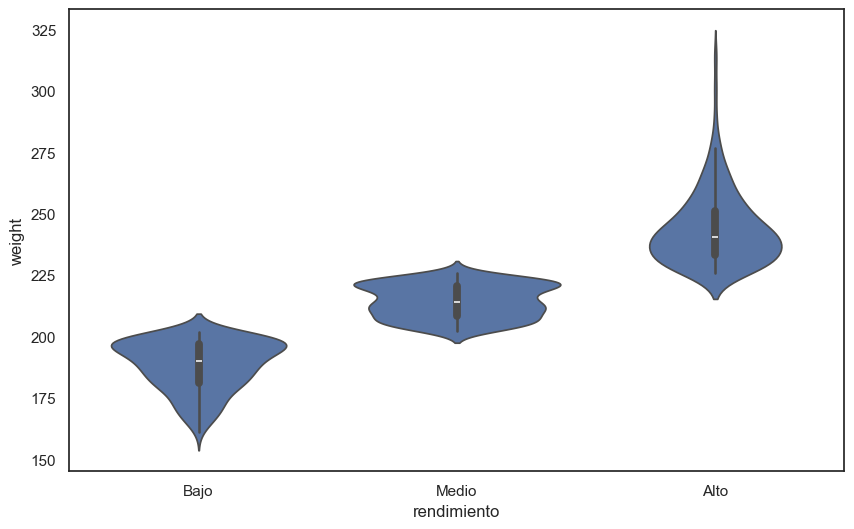

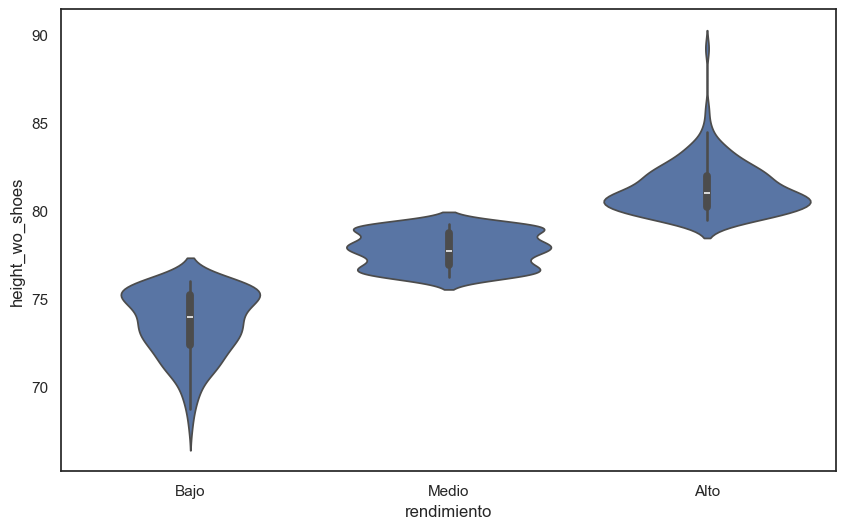

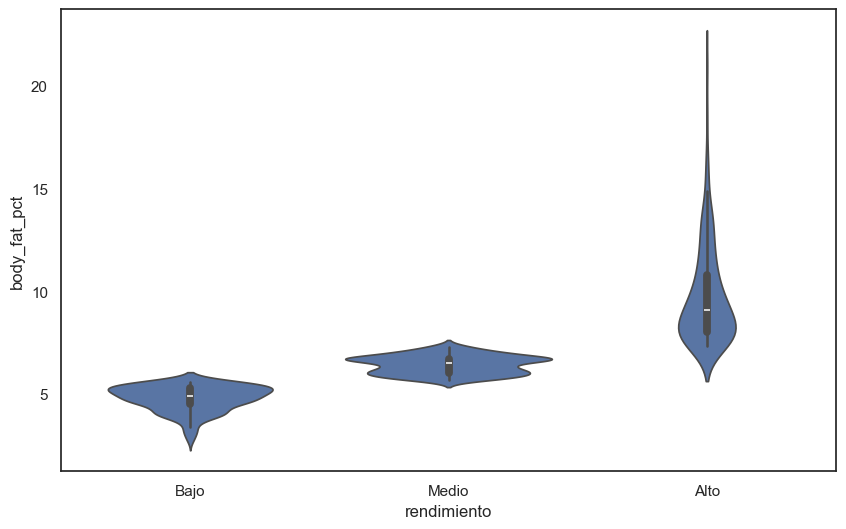

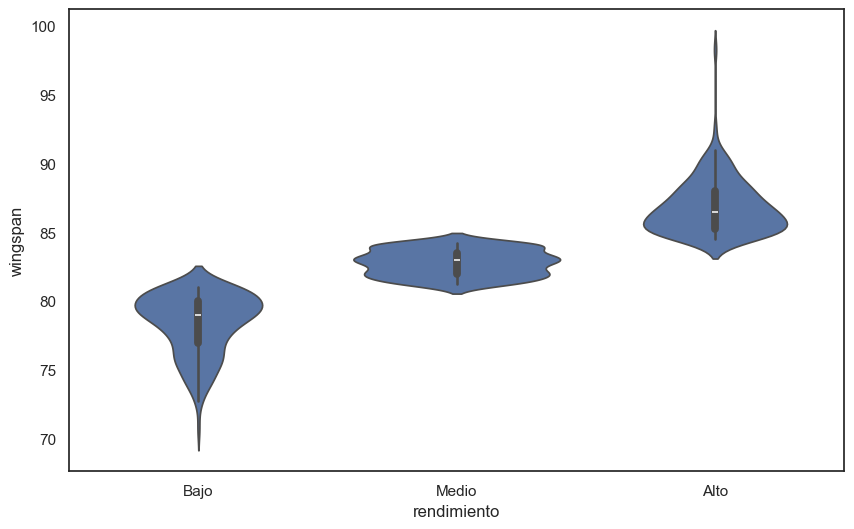

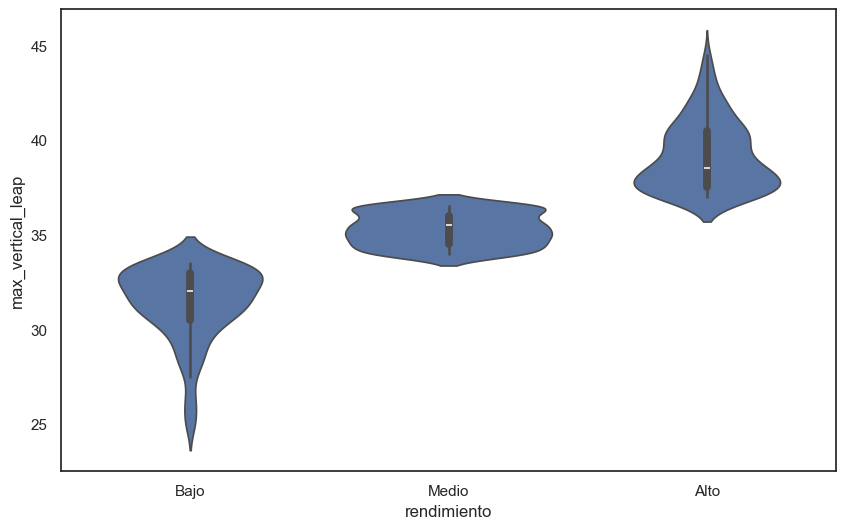

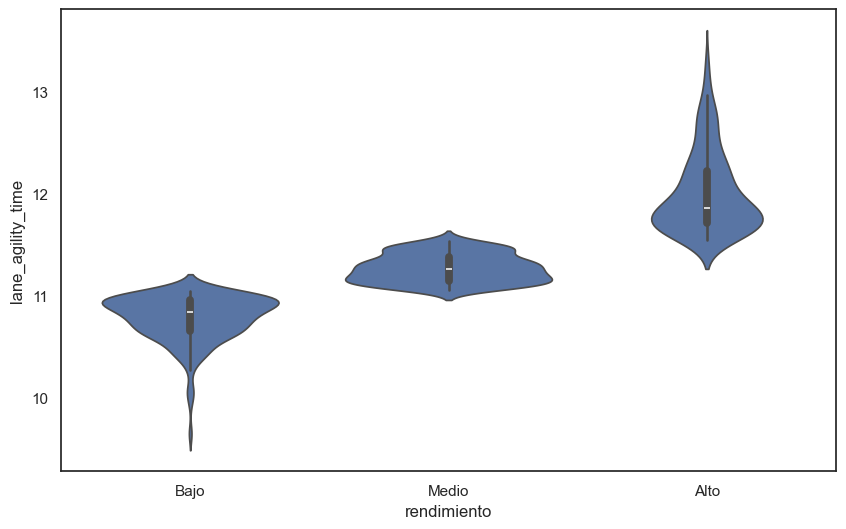

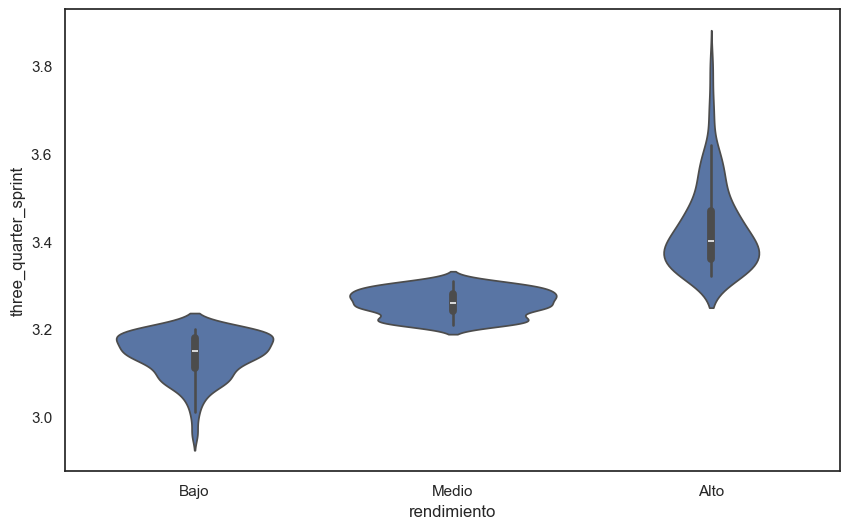

In [75]:
columnas = ['weight', 'height_wo_shoes', 'body_fat_pct', 'wingspan', 'max_vertical_leap', 'lane_agility_time', 'three_quarter_sprint']
for columna in columnas:
#Calcular una métrica de rendimiento (ejemplo: puntos por partido)
    player_perf = draft_combine_stats.groupby('player_id')[columna].mean().reset_index(name='ppg')

    #Merge con métricas físicas
    df_merge = draft_combine_stats.merge(player_perf, on='player_id')

    #Crear categorías de rendimiento (terciles)
    df_merge['rendimiento'] = pd.qcut(df_merge['ppg'], q=3, labels=['Bajo', 'Medio', 'Alto'])
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.violinplot(df_merge, x='rendimiento', y=columna)